In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import joblib

In [2]:
data=pd.read_csv("climate-ds.csv")
data.head(10)

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,0,Albania,Maize,1990,1485,121.0,16.37,36613
1,1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,2,Albania,"Rice, paddy",1990,1485,121.0,16.37,23333
3,3,Albania,Sorghum,1990,1485,121.0,16.37,12500
4,4,Albania,Soybeans,1990,1485,121.0,16.37,7000
5,5,Albania,Wheat,1990,1485,121.0,16.37,30197
6,6,Albania,Maize,1991,1485,121.0,15.36,29068
7,7,Albania,Potatoes,1991,1485,121.0,15.36,77818
8,8,Albania,"Rice, paddy",1991,1485,121.0,15.36,28538
9,9,Albania,Sorghum,1991,1485,121.0,15.36,6667


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
 7   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.7+ MB


In [4]:
data.describe()

,Unnamed: 0,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000
mean,14120.500000,2001.544296,1149.05598,37076.909344,20.542627,77053.332094
std,8152.907488,7.051905,709.81215,59958.784665,6.312051,84956.612897
min,0.000000,1990.000000,51.00000,0.040000,1.300000,50.000000
25%,7060.250000,1995.000000,593.00000,1702.000000,16.702500,19919.250000
50%,14120.500000,2001.000000,1083.00000,17529.440000,21.510000,38295.000000
75%,21180.750000,2008.000000,1668.00000,48687.880000,26.000000,104676.750000
max,28241.000000,2013.000000,3240.00000,367778.000000,30.650000,501412.000000


In [6]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

/var/folders/bj/npfwc8b95w11x3k4l3xs716c0000gn/T/ipykernel_68665/1903786996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_counts.values, y=area_counts.index, palette='coolwarm')
/Users/aryansaini/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aryansaini/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ary

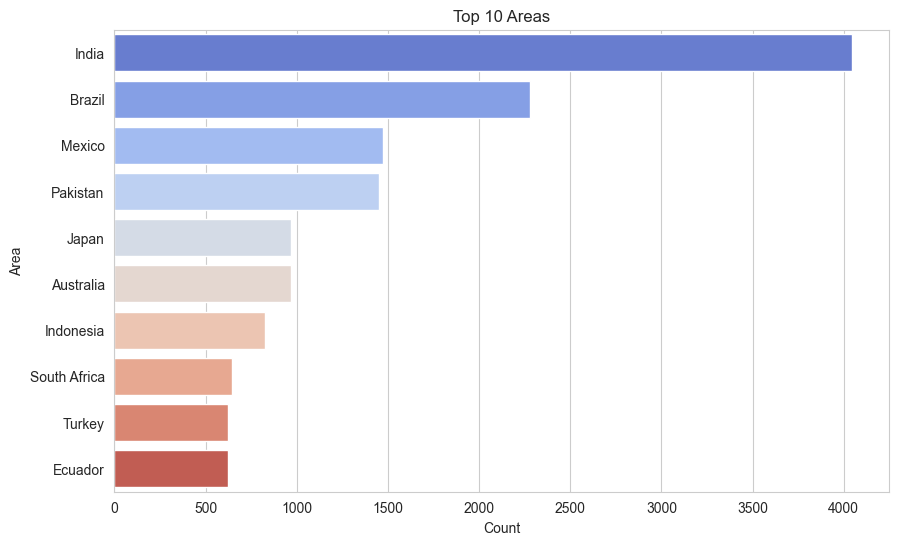

In [20]:
area_counts = data['Area'].value_counts().head(10)
sns.barplot(x=area_counts.values, y=area_counts.index, palette='coolwarm')
plt.title('Top 10 Areas')
plt.xlabel('Count')
plt.ylabel('Area')
plt.show()

/var/folders/bj/npfwc8b95w11x3k4l3xs716c0000gn/T/ipykernel_68665/2303400813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis')
/Users/aryansaini/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aryansaini/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/arya

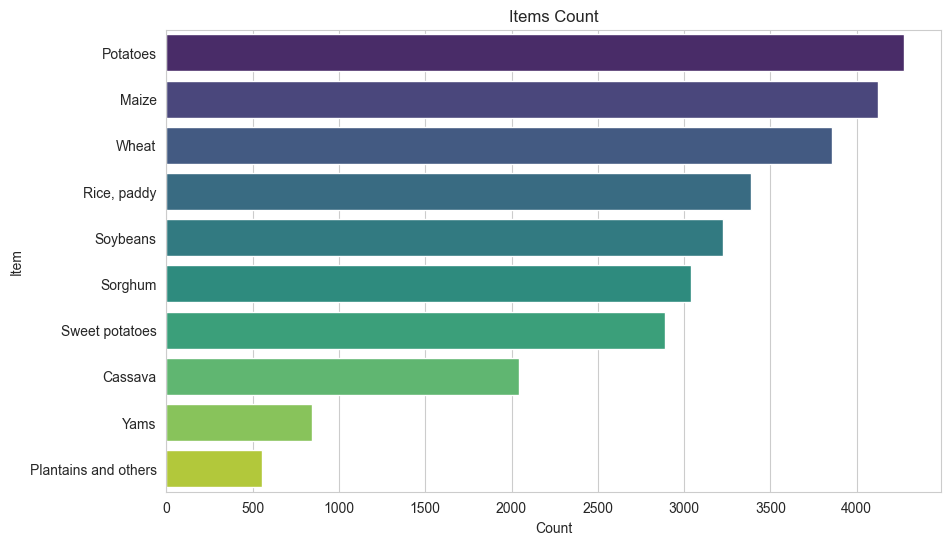

In [19]:

item_counts = data['Item'].value_counts()
sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis')
plt.title('Items Count')
plt.xlabel('Count')
plt.ylabel('Item')
plt.show()

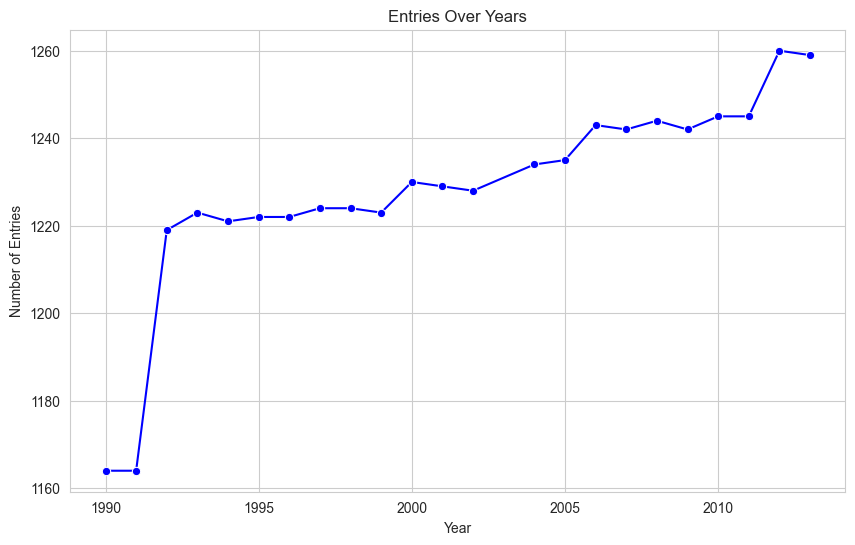

In [18]:
year_counts = data['Year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='b')
plt.title('Entries Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.show()


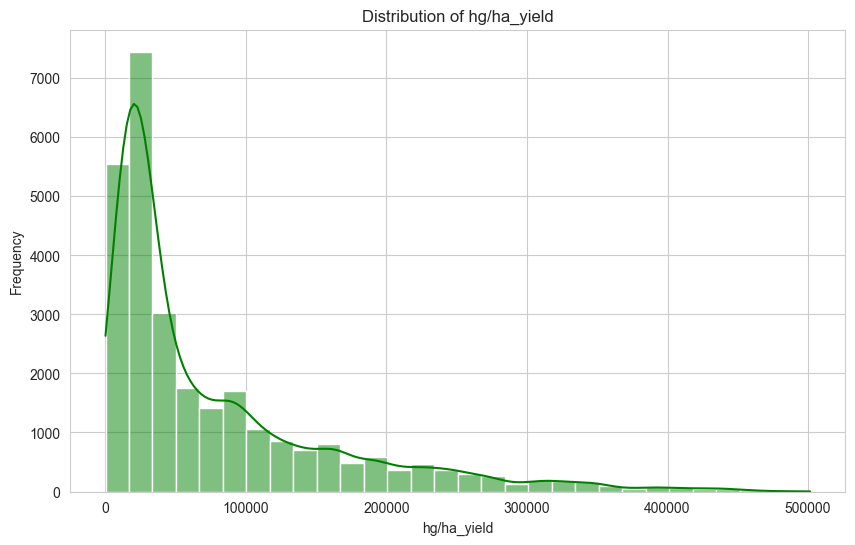

In [17]:
sns.histplot(data['hg/ha_yield'], bins=30, kde=True, color='g')
plt.title('Distribution of hg/ha_yield')
plt.xlabel('hg/ha_yield')
plt.ylabel('Frequency')
plt.show()

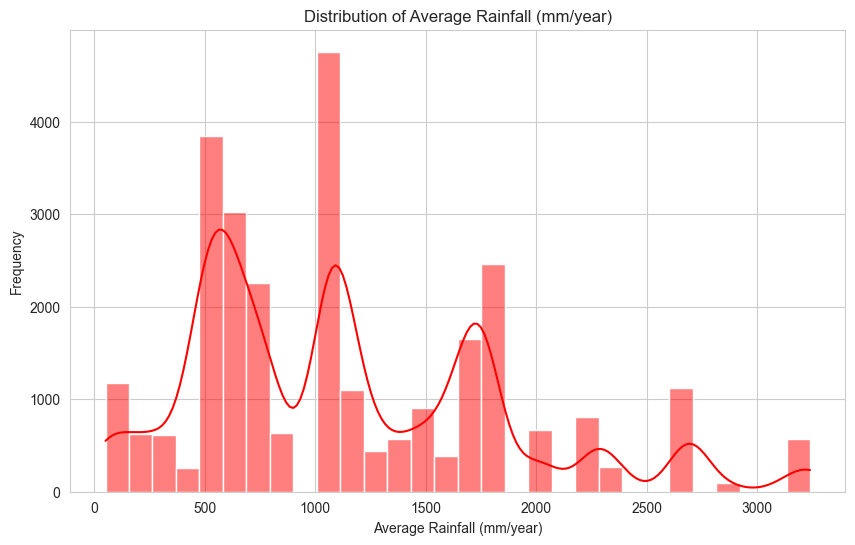

In [16]:
sns.histplot(data['average_rain_fall_mm_per_year'], bins=30, kde=True, color='r')
plt.title('Distribution of Average Rainfall (mm/year)')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Frequency')
plt.show()

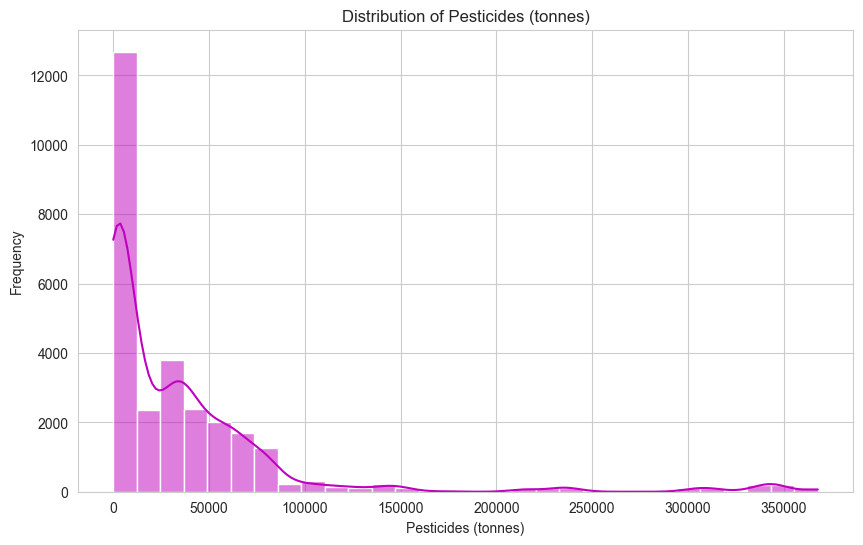

In [15]:
sns.histplot(data['pesticides_tonnes'], bins=30, kde=True, color='m')
plt.title('Distribution of Pesticides (tonnes)')
plt.xlabel('Pesticides (tonnes)')
plt.ylabel('Frequency')
plt.show()


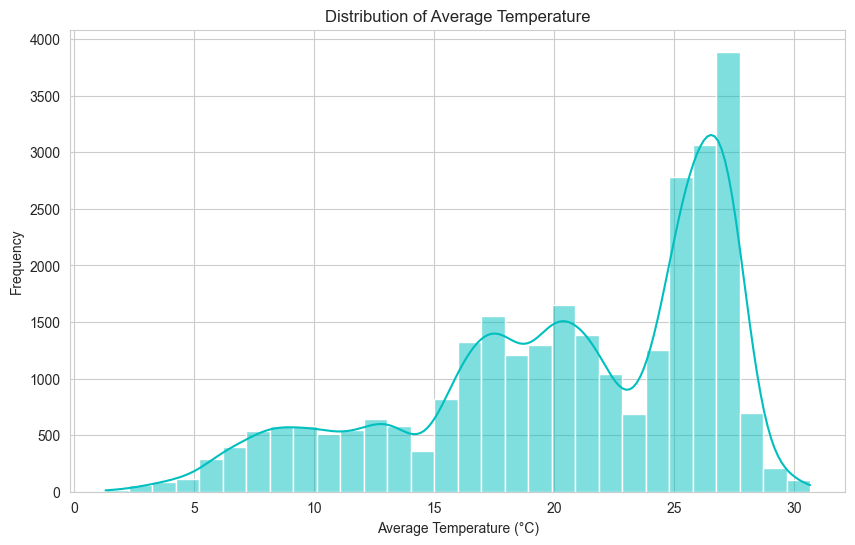

In [14]:
sns.histplot(data['avg_temp'], bins=30, kde=True, color='c')
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

In [22]:
data_renamed = data.rename(columns={
    "hg/ha_yield": "Yield",
    "average_rain_fall_mm_per_year": "Rainfall",
    "pesticides_tonnes": "Pesticides",
    "avg_temp": "Avg_Temp"
})

# Drop the index column if it's not needed
data_cleaned = data_renamed.drop(columns=["Unnamed: 0"])

In [23]:
data_cleaned.head()

,Area,Item,Year,Rainfall,Pesticides,Avg_Temp,Yield
0,Albania,Maize,1990,1485,121.0,16.37,36613
1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.0,16.37,23333
3,Albania,Sorghum,1990,1485,121.0,16.37,12500
4,Albania,Soybeans,1990,1485,121.0,16.37,7000


In [24]:
le_country = LabelEncoder()
le_item = LabelEncoder()
data_cleaned['Country_Encoded'] = le_country.fit_transform(data_cleaned['Area'])
data_cleaned['Item_Encoded'] = le_item.fit_transform(data_cleaned['Item'])

In [25]:
data_cleaned

,Area,Item,Year,Rainfall,Pesticides,Avg_Temp,Yield,Country_Encoded,Item_Encoded
0,Albania,Maize,1990,1485,121.00,16.37,36613,0,1
1,Albania,Potatoes,1990,1485,121.00,16.37,66667,0,3
2,Albania,"Rice, paddy",1990,1485,121.00,16.37,23333,0,4
3,Albania,Sorghum,1990,1485,121.00,16.37,12500,0,5
4,Albania,Soybeans,1990,1485,121.00,16.37,7000,0,6
...,...,...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,657,2550.07,19.76,22581,100,4
28238,Zimbabwe,Sorghum,2013,657,2550.07,19.76,3066,100,5
28239,Zimbabwe,Soybeans,2013,657,2550.07,19.76,13142,100,6
28240,Zimbabwe,Sweet potatoes,2013,657,2550.07,19.76,22222,100,7


In [26]:
le_country.classes_

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [27]:
le_item.classes_

array(['Cassava', 'Maize', 'Plantains and others', 'Potatoes',
       'Rice, paddy', 'Sorghum', 'Soybeans', 'Sweet potatoes', 'Wheat',
       'Yams'], dtype=object)

In [28]:
X = data_cleaned[['Country_Encoded', 'Item_Encoded', 'Pesticides', 'Avg_Temp', 'Rainfall']]
y = data_cleaned['Yield']


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
X_test

,Country_Encoded,Item_Encoded,Pesticides,Avg_Temp,Rainfall
25564,85,4,40719.00,17.21,636
18113,56,8,152.01,19.71,1513
25607,85,5,39043.00,16.51,636
6815,22,3,82439.06,27.45,3240
18144,56,7,130.46,19.65,1513
...,...,...,...,...,...
25027,84,8,26857.00,21.07,495
5508,18,0,918.88,25.49,1604
11393,42,0,61257.00,25.55,1083
16688,48,1,70262.54,13.42,1668


In [32]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


In [33]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
accuracy_xgb = xgb_model.score(X_test, y_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
accuracy_rf = rf_model.score(X_test, y_test)

print(f"RMSE XGBoot: {rmse_xgb}")
print(f"Acc XGBoost: {accuracy_xgb}")

print(f"RMSE RF: {rmse_rf}")
print(f"Acc RF: {accuracy_rf}")

RMSE XGBoot: 15710.22679308867
Acc XGBoost: 0.9659743055818336
RMSE RF: 14006.281839678952
Acc RF: 0.9729549486438772


In [21]:
#saving the models
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [22]:
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [34]:
model = joblib.load('random_forest_model.pkl')

In [39]:
data = {
    "Country_Encoded": [42],
    "Item_Encoded": [8],
    "Pesticides": [75000],
    "Avg_Temp": [25.58],
    "Rainfall": [1200]
}

df = pd.DataFrame(data)

In [40]:
df

,Country_Encoded,Item_Encoded,Pesticides,Avg_Temp,Rainfall
0,42,8,75000,25.58,1200


In [41]:
y_pred = model.predict(df)
    

In [42]:
y_pred[0]

21211.0

In [43]:
item_classes = ['Cassava', 'Maize', 'Plantains and others', 'Potatoes',
       'Rice, paddy', 'Sorghum', 'Soybeans', 'Sweet potatoes', 'Wheat',
       'Yams']
item_hash = {}
for index,item in enumerate(item_classes):
    item_hash[item] = index

In [44]:
item_hash

{'Cassava': 0,
 'Maize': 1,
 'Plantains and others': 2,
 'Potatoes': 3,
 'Rice, paddy': 4,
 'Sorghum': 5,
 'Soybeans': 6,
 'Sweet potatoes': 7,
 'Wheat': 8,
 'Yams': 9}

In [47]:
item_hash["Wheat"]

8